In [13]:
#%%capture
#!rm nest_py_interface.cpython-36m-darwin.so
#!python setup.py build_ext --inplace

In [14]:
import nest_py_interface
import numpy as np

npw = nest_py_interface.nest_py_wrapper_std()
npw.print_result_or_not(0)
#run 1,000,000 background events
results = npw.testNEST(['1000000','NR','0','50', '310', '-1', '1'])

#take absolute value of all events
s1_hits = np.absolute(results.s1_n_hits)
s2_raw_phd = np.absolute(results.s2_raw_area_phd)
s1cphd = np.absolute(results.s1c_area_phd)
s2cphd = np.absolute(results.s2c_area_phd)

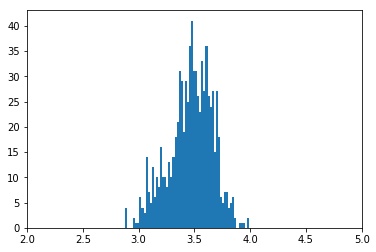

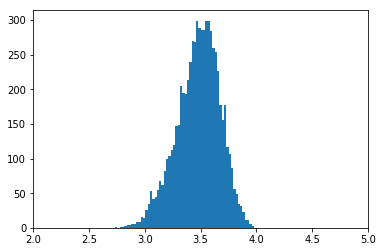

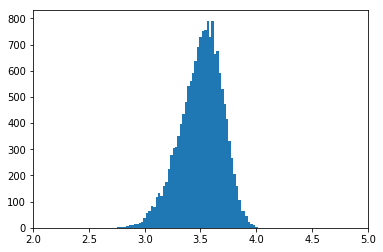

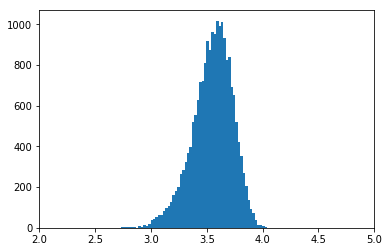

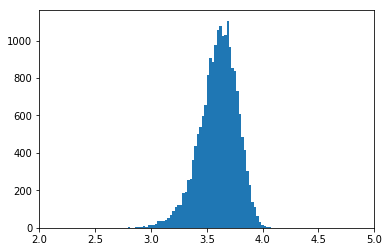

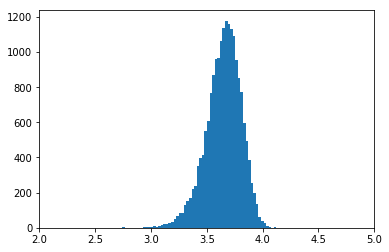

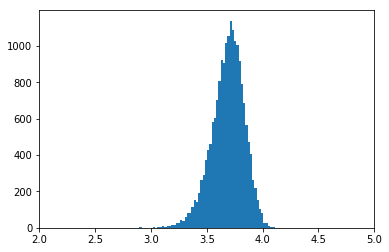

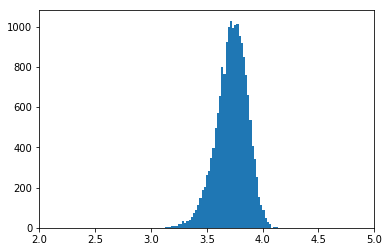

In [15]:
import matplotlib.pyplot as plt
from scipy.stats import norm

s1CutIndicies = np.where(s1_hits >= 3)
s2CutIndicies = np.where(s2_raw_phd >= 415)
#indices that satisfy both requirements
cuts = np.intersect1d(s1CutIndicies,s2CutIndicies)
#the corrected s1 and s2 values at indices that satisfy both conditions
s1cCut = np.take(s1cphd,cuts)
s2cCut = np.take(s2cphd, cuts)
#edges for the bin
edges = np.arange(.3,9,1)

#cannot use numpy array because the matrix will not be rectangular
bins = [None] * (len(edges)-1)
#mean of each bin, assuming normal dist
means = np.zeros([len(edges)-1])
#sigma of each bin, assuming normal dist
sigmas = np.zeros([len(edges)-1])

for i in range(0,len(edges)-1):#check endpoint
    #get the s2 values whose corresponding s1 values are within the bin
    toBinI = s2cCut[(s1cCut >= edges[i])&(s1cCut <= edges[i+1])]
    bins[i] = np.log10(toBinI)
    plt.figure(i)
    plt.hist(bins[i], 60)
    plt.xlim([2,5])
    
    mu, std = norm.fit(bins[i]); means[i] = mu; sigmas[i] = std

plt.show()

In [16]:
s1Bin = np.arange(.8, 7.8, 1)
s1Band = np.arange(.7, 6.01, .01)

#creating mean band and mean +- sigma bands
s2Band = np.interp(s1Band, s1Bin, means[:len(means)-1])
s2Bandp = np.interp(s1Band, s1Bin, means[:len(means)-1] + sigmas[:len(sigmas)-1])
s2Bandm = np.interp(s1Band, s1Bin, means[:len(means)-1] - sigmas[:len(sigmas)-1])

In [17]:
#get 8B results
B8Results = npw.testNEST(['56000000', '8B','0','4','310','-1','1'])
B8nHits = np.absolute(B8Results.s1_n_hits)
B8rawAphd = np.absolute(B8Results.s2_raw_area_phd)
#8B points that will be graphed
s1_selected = np.absolute(B8Results.s1c_area_phd)[(B8nHits >= 3) & (B8rawAphd >= 415)]
s2_selected = np.absolute(B8Results.s2c_area_phd)[(B8nHits >= 3) & (B8rawAphd >= 415)]


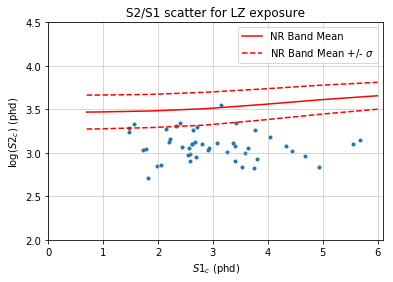

In [25]:
#pick random 8B results and draw them
inde = np.random.permutation(len(s1_selected));
#this is one run's worth of events - we expect 48 of them
inde = inde[0:47];
plt.scatter(s1_selected[inde],np.log10(s2_selected[inde]), marker = '.')
plt.plot(s1Band, s2Band, 'r-', label = "NR Band Mean")
plt.plot(s1Band,s2Bandp, 'r--', label = "NR Band Mean +/- $\sigma$")
plt.plot(s1Band,s2Bandm, 'r--')

plt.ylim([2, 4.5])
plt.xlim([0, 6.1])
plt.xlabel('$S1_c$ (phd)')
plt.ylabel('log($S2_c$) (phd)')
plt.title('S2/S1 scatter for LZ exposure')
plt.grid(True,which='both',linewidth=.5)
plt.legend()